In [1]:
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors
root = tfd.JointDistributionCoroutine.Root

import seaborn as sns

import datetime
print(f"Last Run {datetime.datetime.now()}")

/home/bruno/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/bruno/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
2022-11-08 14:25:56.417153: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-08 14:25:56.526150: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-08 1

Last Run 2022-11-08 14:25:58.148764


In [2]:
df = pd.read_csv("./dati_polveri/polveri_emilia_PM10.csv")
df.head()

,02000003_005_202007.csv,COD_STAZ,ID_PARAM,DATA_INIZIO,DATA_FINE,VALORE,UM,Anno,Mese,Giorno,...,Mesenome,Stazione,COMUNE,INDIRIZZO,PROVINCIA,Altezza,PARAMETRO,TipoStazione,TipoArea,Zonizzazione
0,02000003_005_202007.txt,2000003,5,43831,43832,52,ug/m3,2020,1,1,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
1,02000003_005_202007.txt,2000003,5,43832,43833,59,ug/m3,2020,1,2,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
2,02000003_005_202007.txt,2000003,5,43833,43834,45,ug/m3,2020,1,3,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
3,02000003_005_202007.txt,2000003,5,43834,43835,42,ug/m3,2020,1,4,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
4,02000003_005_202007.txt,2000003,5,43835,43836,31,ug/m3,2020,1,5,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest


In [3]:
def string_date(anno,mese,giorno):
    return str(anno)+"-"+str(mese).zfill(2)+"-"+str(giorno).zfill(2)

In [4]:
#res = df[(df['Stazione']=='MARECCHIA')]
res = df[df['Anno'] == 2018].copy()
aux_df = res[['Anno','Mese', 'Giorno', 'Stazione', 'VALORE']].copy()
aux_df['VALORE'].replace(to_replace=0, value=1, inplace=True)
lista_date = aux_df.apply(lambda vec : string_date(vec[0],vec[1],vec[2]),axis=1).tolist()
lista_log = aux_df.apply(lambda vec : np.log(vec[4]),axis=1).tolist()

final_df = res[['Stazione','VALORE','TipoStazione','TipoArea','Zonizzazione','Altezza','Mese']].copy()
final_df['Date'] = lista_date
final_df['LogVal'] = lista_log

final_df['Mese'].replace(to_replace=1, value='Gennaio', inplace=True)
final_df['Mese'].replace(to_replace=2, value='Febbraio', inplace=True)
final_df['Mese'].replace(to_replace=3, value='Marzo', inplace=True)
final_df['Mese'].replace(to_replace=4, value='Aprile', inplace=True)
final_df['Mese'].replace(to_replace=5, value='Maggio', inplace=True)
final_df['Mese'].replace(to_replace=6, value='Giugno', inplace=True)
final_df['Mese'].replace(to_replace=7, value='Luglio', inplace=True)
final_df['Mese'].replace(to_replace=8, value='Agosto', inplace=True)
final_df['Mese'].replace(to_replace=9, value='Settembre', inplace=True)
final_df['Mese'].replace(to_replace=10, value='Ottobre', inplace=True)
final_df['Mese'].replace(to_replace=11, value='Novembre', inplace=True)
final_df['Mese'].replace(to_replace=12, value='Dicembre', inplace=True)


final_df = final_df.sort_values(by=['Stazione','Date'])
final_df.head()

stazione_df = final_df[final_df['Stazione'] == 'BADIA']

In [5]:
stazione_df.head()

,Stazione,VALORE,TipoStazione,TipoArea,Zonizzazione,Altezza,Mese,Date,LogVal
75727,BADIA,39,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-01,3.663562
75728,BADIA,13,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-02,2.564949
75729,BADIA,12,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-03,2.484907
75730,BADIA,15,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-04,2.708050
75731,BADIA,34,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-05,3.526361


In [6]:
stazione_df.tail()

,Stazione,VALORE,TipoStazione,TipoArea,Zonizzazione,Altezza,Mese,Date,LogVal
76072,BADIA,14,Fondo,Rurale,Pianura Ovest,202.0,Dicembre,2018-12-26,2.639057
76073,BADIA,19,Fondo,Rurale,Pianura Ovest,202.0,Dicembre,2018-12-27,2.944439
76074,BADIA,16,Fondo,Rurale,Pianura Ovest,202.0,Dicembre,2018-12-28,2.772589
76075,BADIA,14,Fondo,Rurale,Pianura Ovest,202.0,Dicembre,2018-12-29,2.639057
76076,BADIA,19,Fondo,Rurale,Pianura Ovest,202.0,Dicembre,2018-12-30,2.944439


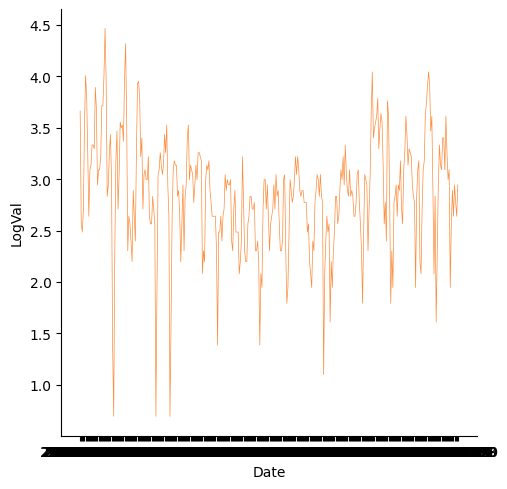

In [7]:
palette = sns.color_palette("YlOrRd",n_colors=len(stazione_df['Stazione'].drop_duplicates().tolist()))

g = sns.relplot(
    data=stazione_df,
    x="Date", y="LogVal",
    kind="line",hue="Stazione",palette=palette,linewidth=0.5
)
g._legend.remove()

In [8]:
# a NUTS sampling routine with simple tuning
from tensorflow_probability.python.internal import unnest
from tensorflow_probability.python.internal import samplers


def run_mcmc_simple(
    n_draws,
    joint_dist,
    n_chains=4,
    num_adaptation_steps=1000,
    return_compiled_function=False,
    target_log_prob_fn=None,
    bijector=None,
    init_state=None,
    seed=None,
    **pins):
    joint_dist_pinned = joint_dist.experimental_pin(**pins) if pins else joint_dist
    if bijector is None:
        bijector = joint_dist_pinned.experimental_default_event_space_bijector()
    if target_log_prob_fn is None:
        target_log_prob_fn = joint_dist_pinned.unnormalized_log_prob

    if seed is None:
        seed = 26401
    run_mcmc_seed = samplers.sanitize_seed(seed, salt='run_mcmc_seed')

    if init_state is None:
        if pins:
            init_state_ = joint_dist_pinned.sample_unpinned(n_chains)
        else:
            init_state_ = joint_dist_pinned.sample(n_chains)
        ini_state_unbound = bijector.inverse(init_state_)
        run_mcmc_seed, *init_seed = samplers.split_seed(
            run_mcmc_seed, n=len(ini_state_unbound)+1)
        init_state = bijector.forward(
            tf.nest.map_structure(
                lambda x, seed: tfd.Uniform(-1., tf.constant(1., x.dtype)).sample(
                    x.shape, seed=seed),
                ini_state_unbound,
                tf.nest.pack_sequence_as(ini_state_unbound, init_seed)))

    @tf.function(autograph=False, jit_compile=True)
    def run_inference_nuts(init_state, draws, tune, seed):
        seed, tuning_seed, sample_seed = samplers.split_seed(seed, n=3)

        def gen_kernel(step_size):
            hmc = tfp.mcmc.NoUTurnSampler(
                target_log_prob_fn=target_log_prob_fn, step_size=step_size)
            hmc = tfp.mcmc.TransformedTransitionKernel(
                hmc, bijector=bijector)
            tuning_hmc = tfp.mcmc.DualAveragingStepSizeAdaptation(
                hmc, tune // 2, target_accept_prob=0.85)
            return tuning_hmc

        def tuning_trace_fn(_, pkr):
            return pkr.inner_results.transformed_state, pkr.new_step_size

        def get_tuned_stepsize(samples, step_size):
            return tf.math.reduce_std(samples, axis=0) * step_size[-1]

        step_size = tf.nest.map_structure(
            tf.ones_like, bijector.inverse(init_state))
        tuning_hmc = gen_kernel(step_size)
        init_samples, (sample_unbounded, tuning_step_size) = tfp.mcmc.sample_chain(
            num_results=200,
            num_burnin_steps=tune // 2 - 200,
            current_state=init_state,
            kernel=tuning_hmc,
            trace_fn=tuning_trace_fn,
            seed=tuning_seed)

        tuning_step_size = tf.nest.pack_sequence_as(
            sample_unbounded, tuning_step_size)
        step_size_new = tf.nest.map_structure(get_tuned_stepsize,
                                              sample_unbounded,
                                              tuning_step_size)
        sample_hmc = gen_kernel(step_size_new)

        def sample_trace_fn(_, pkr):
            energy_diff = unnest.get_innermost(pkr, 'log_accept_ratio')
            return {
                'target_log_prob': unnest.get_innermost(pkr, 'target_log_prob'),
                'n_steps': unnest.get_innermost(pkr, 'leapfrogs_taken'),
                'diverging': unnest.get_innermost(pkr, 'has_divergence'),
                'energy': unnest.get_innermost(pkr, 'energy'),
                'accept_ratio': tf.minimum(1., tf.exp(energy_diff)),
                'reach_max_depth': unnest.get_innermost(pkr, 'reach_max_depth'),
            }
        current_state = tf.nest.map_structure(lambda x: x[-1], init_samples)
        return tfp.mcmc.sample_chain(
            num_results=draws,
            num_burnin_steps=tune // 2,
            current_state=current_state,
            kernel=sample_hmc,
            trace_fn=sample_trace_fn,
            seed=sample_seed)

    mcmc_samples, mcmc_diagnostic = run_inference_nuts(
        init_state, n_draws, num_adaptation_steps, run_mcmc_seed)

    if return_compiled_function:
        return mcmc_samples, mcmc_diagnostic, run_inference_nuts
    else:
        return mcmc_samples, mcmc_diagnostic

In [9]:
import warnings
from statsmodels.tsa.statespace.tools import diff as tsa_diff
from tensorflow_probability.python.internal import distribution_util
from tensorflow_probability.python.internal import prefer_static as ps


class SARIMAX:
    # Similar to https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html
    # with simple differencing
    def __init__(self,
                 observed,
                 design_matrix=None,
                 order=(1, 0, 0),
                 dtype=np.float32
                 ):
        """
        ARIMAX Likelihood for univariate time series
        
        order - (p,d,q)
        """
        # Static parameters
        self.p, self.d, self.q = order

        # Dynamic regression
        if design_matrix is not None:
            assert ps.rank(design_matrix) >= 2
            assert ps.shape(design_matrix)[-2] == observed.shape[-1]

            self.design_matrix = tf.convert_to_tensor(
                np.diff(design_matrix, n=self.d, axis=0), dtype=dtype)
        else:
            self.design_matrix = None

        self.r = max(self.p, self.q)

        # Simple differencing
        observed_diff = tsa_diff(
            observed,
            k_diff=self.d)
        self.observed = tf.convert_to_tensor(observed_diff, dtype=dtype)

        self.dtype = dtype

    def _log_prob(self, *args):
        mu0 = args[0]  # Location parameter
        sigma = args[1]  # Scale parameter
        i = 2
        if self.design_matrix is not None:  # regression coefficients
            reg_coeff = args[i]
            mu_t = mu0[None, ...] + \
                tf.einsum('...i,ji->j...', reg_coeff, self.design_matrix)
            i += 1
        else:
            mu_t = tf.einsum('...,j->j...', mu0, ps.ones_like(self.observed))

        # Parse args and prepare states
        if self.p > 0:  # AR coefficients
            phi = args[i]
            i += 1
        if self.q > 0:  # MA coefficients
            theta = args[i]
            i += 1

        batch_shape = ps.shape(mu0)
        y_extended = ps.concat(
            [ps.zeros(tf.concat([[self.r], batch_shape], axis=0), dtype=mu0.dtype),
             tf.einsum('...,j->j...',
                       ps.ones_like(mu0, dtype=self.observed.dtype),
                       self.observed)],
            axis=0
        )
        eps_t = ps.zeros_like(y_extended, dtype=self.observed.dtype)

        def body_fn(t, mu_t, eps_t):
            mu_temp = []
            t_switch = t + self.r
            if self.p > 0:  # AR
                y_past = tf.gather(
                    y_extended, t_switch - (np.arange(self.p) + 1))
                ar = tf.einsum("...p,p...->...", phi, y_past)
                mu_temp.append(ar)
            if self.q > 0:  # MA
                eps_past = tf.gather(
                    eps_t, t_switch - (np.arange(self.q) + 1))
                ma = tf.einsum("...q,q...->...", theta, eps_past)
                mu_temp.append(ma)
            mu_update = sum(mu_temp) + tf.gather(mu_t, t)
            mu_t_next = tf.tensor_scatter_nd_update(
                mu_t, [[t]], mu_update[None, ...])

            eps_update = tf.gather(y_extended, t_switch) - mu_update
            epsilon_t_next = tf.tensor_scatter_nd_update(
                eps_t, [[t_switch]], eps_update[None, ...])
            return t+1, mu_t_next, epsilon_t_next

        t, mu_output, eps_output_ = tf.while_loop(
            lambda t, *_: t < self.observed.shape[-1],
            body_fn,
            loop_vars=(0, mu_t, eps_t),
            maximum_iterations=self.observed.shape[-1])
        eps_output = eps_output_[self.r:]
        return tfd.Normal(0, sigma[None, ...]).log_prob(eps_output), mu_output
    
    def log_prob(self, *args):
        log_prob_val, _ = self._log_prob(*args)
        return ps.reduce_sum(log_prob_val, axis=0)
    
    def log_prob_elementwise(self, *args):
        sigma = args[1]  # Scale parameter
        _, mu_output = self._log_prob(*args)
        mu = distribution_util.move_dimension(mu_output, 0, -1)
        return tfd.Normal(mu, sigma[..., None]).log_prob(self.observed)

# Definizione di prior e iperparametri

In [10]:
p, q = 1, 1
d = 1

@tfd.JointDistributionCoroutine
def sarima_priors():
    mu0 = yield root(tfd.StudentT(df=6, loc=0, scale=2.5, name='mu0'))
    sigma = yield root(tfd.HalfStudentT(df=7, loc=0, scale=1., name='sigma'))
    phi = yield root(tfd.Sample(tfd.Normal(loc=0, scale=0.5), p, name='phi'))
    theta = yield root(tfd.Sample(tfd.Normal(loc=0, scale=0.5), q, name='theta'))


sarima_1 = SARIMAX(
    stazione_df['LogVal'],
    order=(p, d, q))

/home/bruno/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/tools.py:286: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  differenced = differenced.diff()[1:]
2022-11-08 14:26:02.056417: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 14:26:02.056824: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-08 14:26:02.056885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libra

# Esecuzione di MCMC

In [11]:
%%time
target_log_prob_fn = lambda *x: sarima_priors.log_prob(
    *x) + sarima_1.log_prob(*x)

mcmc_samples, sampler_stats = run_mcmc_simple(
    10000, sarima_priors, n_chains=4, num_adaptation_steps=1000,
    target_log_prob_fn=target_log_prob_fn,
    seed=tf.constant([623453, 456345], dtype=tf.int32),
)

2022-11-08 14:26:09.013768: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x5635f1e31310 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-11-08 14:26:09.013832: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2022-11-08 14:26:09.272151: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-11-08 14:26:23.892435: I tensorflow/compiler/jit/xla_compilation_cache.cc:476] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


CPU times: user 50.3 s, sys: 281 ms, total: 50.6 s
Wall time: 50.7 s


# Posterior, traceplot e statistiche dell'MCMC

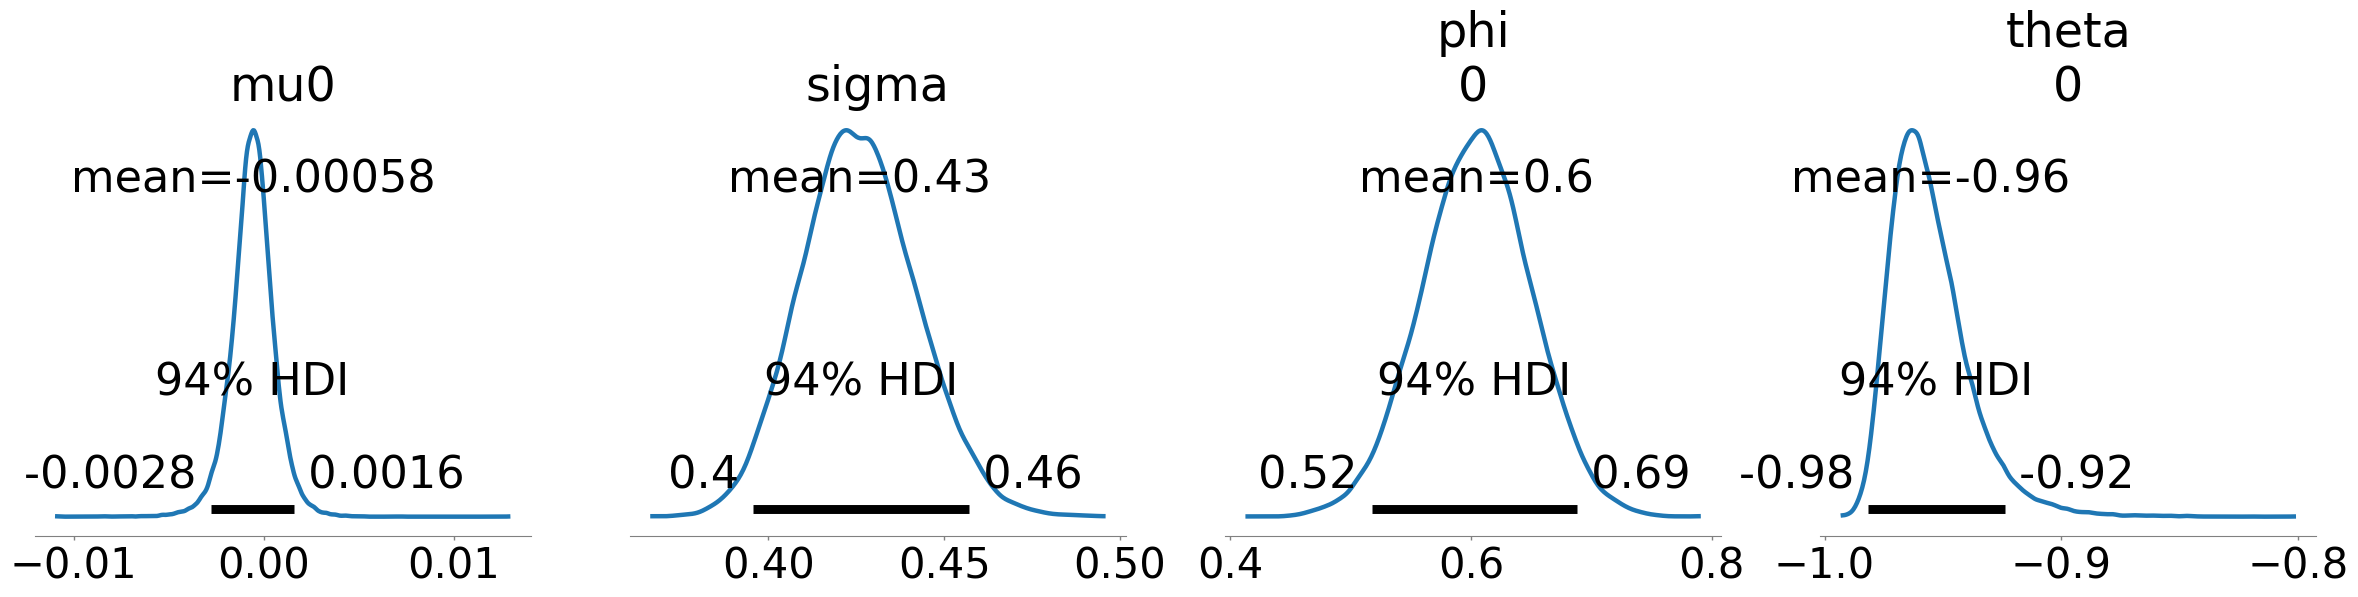

In [12]:

data_likelihood = np.swapaxes(sarima_1.log_prob_elementwise(*mcmc_samples), 1, 0)
sarima_0_idata = az.from_dict(
    posterior={
        k:np.swapaxes(v.numpy(), 1, 0)
        for k, v in mcmc_samples._asdict().items()},
    sample_stats={
        k:np.swapaxes(sampler_stats[k], 1, 0)
        for k in ["target_log_prob", "diverging", "accept_ratio", "n_steps"]},
    observed_data={'observed': sarima_1.observed},
    log_likelihood={'observed': data_likelihood},
)

axes = az.plot_posterior(sarima_0_idata, backend='matplotlib', textsize=30.0);

In [13]:
az.summary(sarima_0_idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu0,-0.001,0.001,-0.003,0.002,0.0,0.0,25771.0,19572.0,1.0
sigma,0.426,0.016,0.396,0.457,0.0,0.0,32678.0,26036.0,1.0
phi[0],0.604,0.046,0.518,0.688,0.0,0.0,27521.0,23530.0,1.0
theta[0],-0.955,0.017,-0.982,-0.924,0.0,0.0,18706.0,15312.0,1.0
